## Dates and Times with lubridate

時間, 年月を扱うのは実は難しい

- 1年は必ず365日か
- 1日は必ず24時間なのか
- 1分は必ず60秒なのか


In [3]:
library (tidyverse)
library (lubridate)
library (nycflights13)

### Creating Date/Time

時間を表すデータ型には三つある. 

- date
- time
- date-time

ここでは, date, date-timeを扱うけど, timeを使いたいばあいには`hms`パッケージを利用すればよい. 

In [4]:
today()

[1] "2017-06-01"

In [5]:
now()

[1] "2017-06-01 19:27:35 JST"

####  From Strings

In [9]:
ymd("2017-10-1")
dmy("01-03-2011")
mdy("01-02-2017")

[1] "2017-10-01"

[1] "2011-03-01"

[1] "2017-01-02"

In [32]:
ymd_hms("2014-01-02 20:10:02", tz="Asia/tokyo")

[1] "2014-01-02 20:10:02 JST"

#### From Individual Components

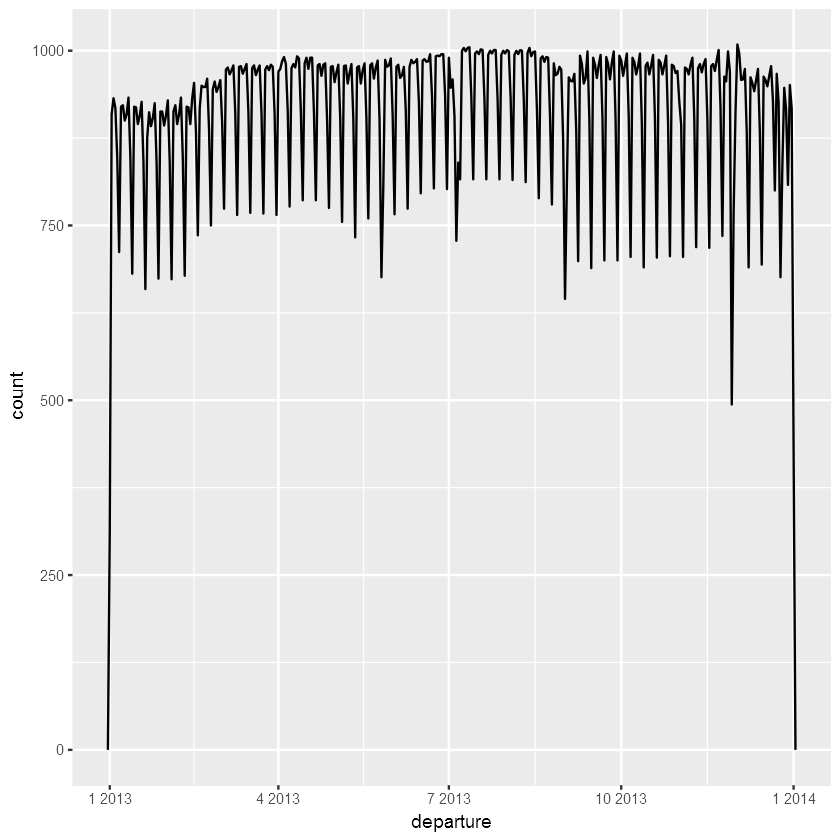

In [35]:
flights %>%
    select (year, month, day, hour, minute) %>%
    mutate (
        departure = make_datetime (year, month, day, hour, minute)
    ) %>% 
    ggplot(aes(departure)) + 
    geom_freqpoly(binwidth = 86400)

#### From Other Types

In [36]:
as_datetime(today())

[1] "2017-06-01 UTC"

### Date-Time Componets

In [37]:
datetime <- ymd_hms ("2016-07-08 12:34:56")
year(datetime)
month(datetime)
mday(datetime)
yday(datetime)
wday(datetime)

month (datetime, label = TRUE)
wday(datetime, label=TRUE, abbr=FALSE)




[1] 2016

[1] 7

[1] 8

[1] 190

[1] 6

[1] Jul
12 Levels: Jan < Feb < Mar < Apr < May < Jun < Jul < Aug < Sep < ... < Dec

[1] Friday
7 Levels: Sunday < Monday < Tuesday < Wednesday < Thursday < ... < Saturday

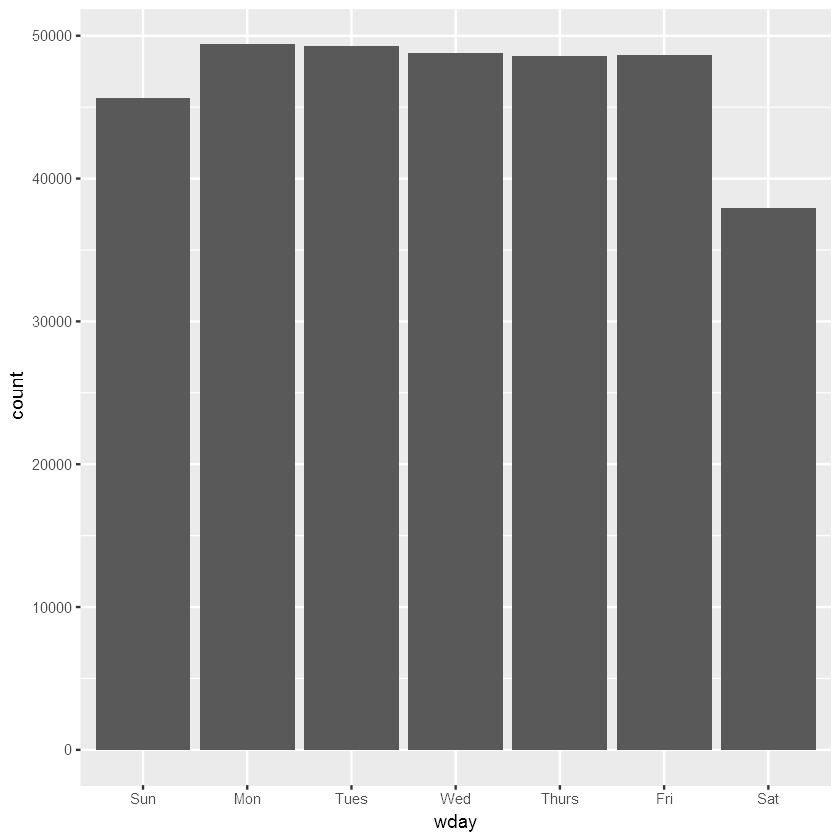

In [44]:

make_datetime_100 <- function (year, month, day, time) {
    make_datetime(year, month, day, time%/%100, time%%100)
}
flights_dt <- 
    flights %>%
    filter (!is.na (dep_time), !is.na(arr_time)) %>%
    mutate (
        dep_time = make_datetime_100(year, month, day, dep_time), 
        arr_time = make_datetime_100(year, month, day, arr_time), 
        sched_dep_time = make_datetime_100(
            year, month, day, sched_dep_time
        ), 
        sched_arr_time = make_datetime_100 (
            year, month, day, sched_arr_time
        )
    ) %>%
    select(origin, dest, ends_with("delay"), ends_with("time"))


flights_dt%>%
    mutate (wday = wday(dep_time, label=TRUE)) %>%
    ggplot(aes(x=wday)) + 
    geom_bar()

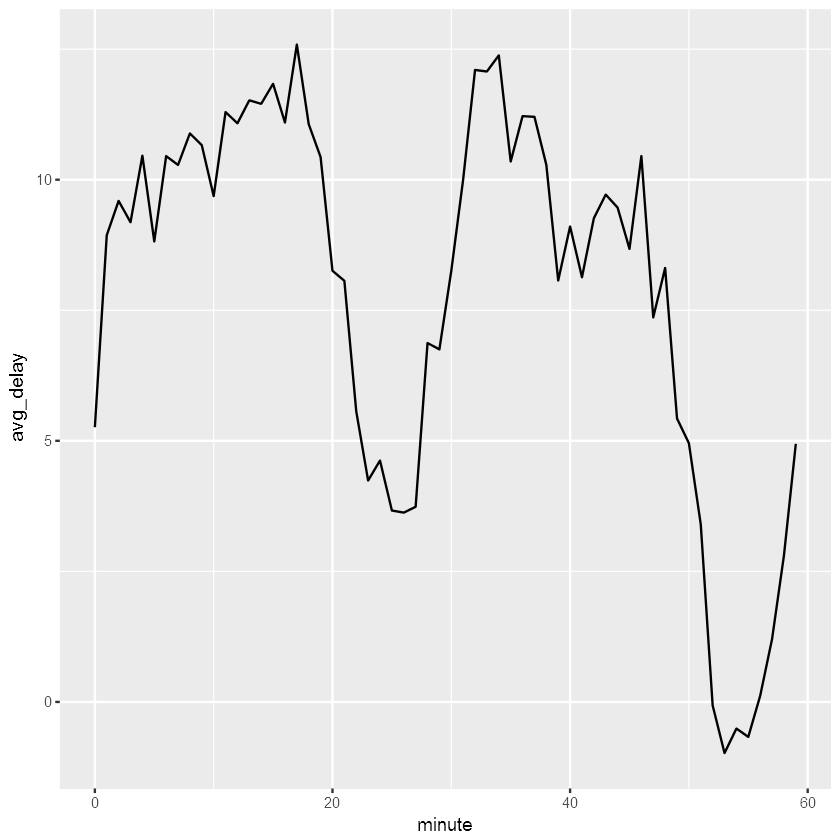

In [46]:
flights_dt %>%
    mutate(minute = minute(dep_time)) %>%
    group_by (minute) %>%
    summarise (
        avg_delay = mean(arr_delay, na.rm=TRUE), 
        n = n()
    ) %>%
    ggplot(aes(minute, avg_delay)) + 
    geom_line()

### Rounding

- round_date()
- ceiling_date()
- floor_date()
- ..etc

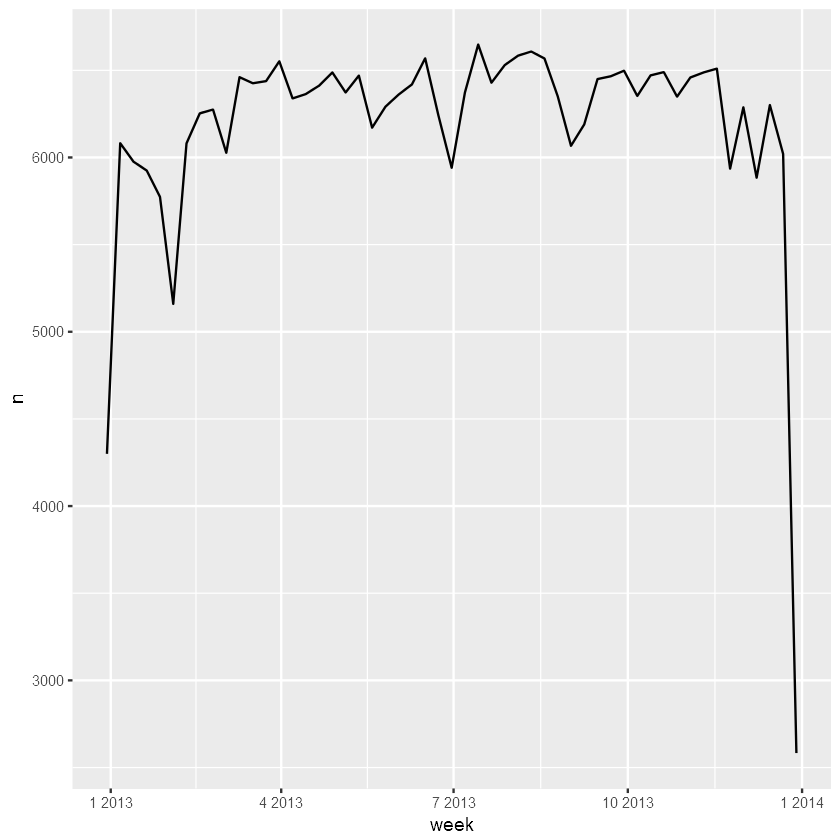

In [50]:
flights_dt %>%
    count (week = floor_date(dep_time, "week")) %>%
    ggplot(aes(week, n)) +
    geom_line()

In [56]:
    flights_dt %>%
    mutate (week = floor_date(dep_time, "week"), a = wday(week, label=TRUE))  %>%
    sample_n(30) %>% select(week, a) %>% print()

# A tibble: 30 x 2
         week     a
       <dttm> <ord>
 1 2013-01-20   Sun
 2 2013-07-14   Sun
 3 2013-10-06   Sun
 4 2013-02-24   Sun
 5 2013-12-15   Sun
 6 2013-12-01   Sun
 7 2013-03-24   Sun
 8 2013-12-22   Sun
 9 2013-03-17   Sun
10 2013-07-14   Sun
# ... with 20 more rows


#### Setting Componets

In [57]:
(datetime <- ymd_hms("2016-08-08 12:34:56"))

[1] "2016-08-08 12:34:56 UTC"

In [59]:
year(datetime) <- 2020; datetime

[1] "2020-08-08 12:34:56 UTC"

In [60]:
month(datetime) <- 01; datetime

[1] "2020-01-08 12:34:56 UTC"

In [61]:
update(datetime, year=2020, month=2, mday=2, hour=2)

[1] "2020-02-02 02:34:56 UTC"

In [62]:
# 値が大きすぎると, 一周してくる
update(datetime, mday=32)

[1] "2020-02-01 12:34:56 UTC"

### Time Spans

時間クラス同士の演算について. 次の三つを知っておく必要がある. 

- Durations, 正確な秒数
- Periods, 月や週といった人工的な間隔
- Intervals, 最初と最後の点を表現している

#### Durations



In [63]:
h_age <- today() - ymd(19791014)
h_age;

Time difference of 13745 days

In [64]:
# lubridateを使えば異なるクラスの値も変換が可能である
as.duration(h_age)

[1] "1187568000s (~37.63 years)"

In [65]:
dseconds(15)

[1] "15s"

In [66]:
dminutes(10)

[1] "600s (~10 minutes)"

In [67]:
dhours(c(12, 14))

[1] "43200s (~12 hours)" "50400s (~14 hours)"

In [68]:
ddays(0:5)

[1] "0s"                "86400s (~1 days)"  "172800s (~2 days)"
[4] "259200s (~3 days)" "345600s (~4 days)" "432000s (~5 days)"

In [70]:
dweeks(3)

[1] "1814400s (~3 weeks)"

In [72]:
dyears(3)

[1] "94608000s (~3 years)"

In [80]:
dyears(1) + dweeks(52)
2 * years(2);
today() - dyears(1);

[1] "62985600s (~2 years)"

[1] "4y 0m 0d 0H 0M 0S"

[1] "2016-06-01"

### Periods

In [81]:
seconds(1);
minutes(10);
hours(c(12, 24))
days(7);
months(1:6);
weeks(3);
years(1);
 10 * (months(6) + days(1))

[1] "1S"

[1] "10M 0S"

[1] "12H 0M 0S" "24H 0M 0S"

[1] "7d 0H 0M 0S"

[1] "1m 0d 0H 0M 0S" "2m 0d 0H 0M 0S" "3m 0d 0H 0M 0S" "4m 0d 0H 0M 0S"
[5] "5m 0d 0H 0M 0S" "6m 0d 0H 0M 0S"

[1] "21d 0H 0M 0S"

[1] "1y 0m 0d 0H 0M 0S"

[1] "60m 10d 0H 0M 0S"

In [83]:
## periodsを使った方が, durationよりも直感的
ymd(20160101) + dyears(1)
ymd(20160101) + years(1)

[1] "2016-12-31"

[1] "2017-01-01"

In [85]:
## periodを利用して, flightsデータのおかしなレコードを抽出しよう
flights_dt %>%
    filter (arr_time < dep_time) # 到着時間が出発時間よりも前, overnightという現象

origin,dest,dep_delay,arr_delay,dep_time,sched_dep_time,arr_time,sched_arr_time,air_time
EWR,BQN,9,-4,2013-01-01 19:29:00,2013-01-01 19:20:00,2013-01-01 00:03:00,2013-01-01 00:07:00,192
JFK,DFW,59,NA,2013-01-01 19:39:00,2013-01-01 18:40:00,2013-01-01 00:29:00,2013-01-01 21:51:00,NA
EWR,TPA,-2,9,2013-01-01 20:58:00,2013-01-01 21:00:00,2013-01-01 00:08:00,2013-01-01 23:59:00,159
EWR,SJU,-6,-12,2013-01-01 21:02:00,2013-01-01 21:08:00,2013-01-01 01:46:00,2013-01-01 01:58:00,199
EWR,SFO,11,-14,2013-01-01 21:08:00,2013-01-01 20:57:00,2013-01-01 00:25:00,2013-01-01 00:39:00,354
LGA,FLL,-10,-2,2013-01-01 21:20:00,2013-01-01 21:30:00,2013-01-01 00:16:00,2013-01-01 00:18:00,160
EWR,MCO,41,43,2013-01-01 21:21:00,2013-01-01 20:40:00,2013-01-01 00:06:00,2013-01-01 23:23:00,143
JFK,LAX,-7,-24,2013-01-01 21:28:00,2013-01-01 21:35:00,2013-01-01 00:26:00,2013-01-01 00:50:00,338
EWR,FLL,49,28,2013-01-01 21:34:00,2013-01-01 20:45:00,2013-01-01 00:20:00,2013-01-01 23:52:00,152
EWR,FLL,-9,-14,2013-01-01 21:36:00,2013-01-01 21:45:00,2013-01-01 00:25:00,2013-01-01 00:39:00,154


In [86]:
flights_dt <- flights_dt %>%
    mutate (
        overnight = arr_time < dep_time, 
        arr_time  = arr_time + days(overnight * 1), 
        sched_arr_time = sched_arr_time + days(overnight * 1)
    )


### TimeZones

In [87]:
Sys.timezone()

[1] "Asia/Tokyo"